In [1]:
import sys 
sys.path.append("../src/")

import matplotlib.pyplot as plt
import numpy as np
import os
from ComparisonLib import NetGAPStats, ComparisonSaver



In [55]:
def plot_score_vs_time(plot_labels):
    for i,label in enumerate(plot_labels):
        genetic_time = [len(data.best_state['graph']['links'])/2*label/1000 for data in time_dict[str(label)] if data.evaluator=='GeneticEvaluator']
        neural_time  = [len(data.best_state['graph']['links'])/2*label/1000 for data in time_dict[str(label)] if data.evaluator=='NeuralEvaluator']

        genetic_score=[data.best_state_score for data in time_dict[str(label)] if data.evaluator=='GeneticEvaluator']
        neural_score=[data.best_state_score for data in time_dict[str(label)] if data.evaluator=='NeuralEvaluator']
        plt.scatter(genetic_time, genetic_score,label=f'Genetic {int(40*label/1000)}',marker='+')
        plt.scatter(neural_time, neural_score,label=f'Neural {int(40*label/1000)}',marker='.') 

        plt.plot([int(40*label/1000)]*2,[0.5,0.9],color='black') 

    plt.xscale('log', base=2)
    plt.legend()
    plt.show()

    #fig, axs = plt.subplots(1, 2, sharey=True,tight_layout=True)
def plot_score_vs_throughput(plot_labels,xscale='linear',xbase=10):
    for evaluator in ['GeneticEvaluator','NeuralEvaluator']:
        for i,label in enumerate(plot_labels):
            time = [data.time for data in time_dict[str(label)] if data.evaluator==evaluator and 'time' in data.__dict__]
            if len(time) > 0:
                size = [data.tree_size for data in time_dict[str(label)] if data.evaluator==evaluator]

                throughput=np.divide(np.array(size),np.array(time))

                score =[data.best_state_score for data in time_dict[str(label)] if data.evaluator==evaluator]
                #colors = ['#fafa6e','#86d780','#23aa8f','#007882','#2a4858'] if evaluator == 'GeneticEvaluator' else ['#f86efa',  '#9da8ff','#00cfff','#00eaff','#00fcff']
                #colors = ['#70ce6e','#00bda0','#00a4c7','#0084cc','#5a5eab']
                #colors = ['#5c4973','#4e5b7a','#538281','#588964','#76905d']
                colors = ['#8255b9','#4f6bb4','#4caba9','#4aa260','#6f9848','#a0a342'] 


                marker = '+' if evaluator == 'GeneticEvaluator'else '.'
                lbl = 'Gen' if evaluator == 'GeneticEvaluator'else 'Hyb'
                plt.scatter(throughput, score,label=f'{lbl} {int(label*40/1000)}s',marker=marker,c=[colors[i]]*len(score))
                
    if xscale == 'log':
        plt.xscale(xscale,base=xbase)
    else:
        plt.xscale(xscale)
   

    plt.grid()
    plt.legend(ncol=2)
    plt.xlabel('Tree Exploration Throughput (nodes/s)')
    plt.ylabel('Reward')
    plt.show()

def plot_throughput_dist(plot_labels,xscale='linear',xbase=10):
    fig, axs = plt.subplots(1, len(plot_labels), sharey=True,tight_layout=True)
    minx, maxx = 0,1
    for i,label in enumerate(plot_labels):

        genetic_time = [data.time for data in time_dict[str(label)] if data.evaluator=='GeneticEvaluator'  and 'time' in data.__dict__]
        neural_time  = [data.time for data in time_dict[str(label)] if data.evaluator=='NeuralEvaluator'  and 'time' in data.__dict__]

        genetic_size = [data.tree_size for data in time_dict[str(label)] if data.evaluator=='GeneticEvaluator']
        neural_size  = [data.tree_size for data in time_dict[str(label)] if data.evaluator=='NeuralEvaluator']   

        genetic_throughput=np.divide(np.array(genetic_size),np.array(genetic_time))
        neural_throughput=np.divide(np.array(neural_size),np.array(neural_time))

        minx, maxx = min(minx,min(genetic_throughput),min(neural_throughput)), max(maxx,max(genetic_throughput),max(neural_throughput))

        genetic_score=[data.best_state_score for data in time_dict[str(label)] if data.evaluator=='GeneticEvaluator']
        neural_score=[data.best_state_score for data in time_dict[str(label)] if data.evaluator=='NeuralEvaluator']
        axs[i].scatter(genetic_throughput, genetic_score,label='Gen',marker='x')
        axs[i].scatter(neural_throughput, neural_score,label='Hyb',marker='+')
        axs[i].set_title(f'limit: {int(label*40/1000)}s')
        
        if xscale == 'log':
            axs[i].set_xscale(xscale,base=xbase)
        else:
            axs[i].set_xscale(xscale)
   
        axs[i].legend(loc='lower center',borderpad=0.2)
    
    for i  in range(len(plot_labels)):
        axs[i].set_xlim([minx,maxx])

    plt.show()
    
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

def plot_dist(labels,data_dict,which='best_state_score',scale='linear',label_function= (lambda x:x),base=10,sharey=True, y_label="" ): #which in data data.__dict__.keys()

    colors=['lightblue', 'lightgreen']
    case=which
    fig, axs = plt.subplots(1, len(labels), sharey=sharey,tight_layout=True,figsize=(6,4))
    #fig.suptitle(case)
    miny, maxy = 1,0
    for i,label in enumerate(labels):
        
        genetic=[data.__dict__[case] for data in data_dict[str(label)] if data.evaluator=='GeneticEvaluator' and case in data.__dict__]
        neural=[data.__dict__[case] for data in data_dict[str(label)] if data.evaluator=='HybridEvaluator' and case in data.__dict__]
        miny, maxy = min(miny,min(genetic),min(neural)), max(maxy,max(genetic),max(neural))
        
        if len(genetic)>0 and len(neural)>0:
            miny, maxy = min(miny,min(genetic),min(neural)), max(maxy,max(genetic),max(neural))

        #print("\tGenetic:", np.mean(genetic))
        #print("\tNeural:",np.mean(neural))

        axs[i].set_title(f'limit: {str(label_function(label))}')
        
        
       
        bplot = axs[i].boxplot([genetic,neural],labels=['Gen','Hyb'],sym='+',widths=0.3)#,patch_artist=True)#, notch=True,bootstrap=100)
        vplot = axs[i].violinplot([genetic,neural], showmeans=False,showmedians=False,showextrema=False,widths=0.8)
        
        if scale == 'log':
            axs[i].set_yscale(scale,base=base)
        else:
            axs[i].set_yscale(scale)
            
        for body,color in zip(vplot['bodies'],colors):
            body.set_facecolor(color)
            body.set_alpha(0.625)
        #for patch in bplot['boxes']:
            #patch.set_facecolor('black')
            #patch.set_linestyle
            #patch.set_linestyle(color='red')
        
    plt.ylim([miny*0.99, maxy*1.01])
    
    axs[0].set_ylabel(y_label)
    plt.show()



In [40]:

directory='C:/Users\smora\Documents\LiU\Workspace\\NetGAP\data\comparisons'
saver = ComparisonSaver(directory)
time_dict={}
it_dict={}

time_labels=[]
it_labels=[]

th_dict={}
th_list=[]

for filename in os.listdir(directory):
    if 'comparison' in filename:
       
        tokens=filename.split('_')
        if 'time' in tokens[1]:
            data=saver.load(filename.replace('.json',''))
            label=int(tokens[1].replace('time','').replace('.json',''))
            time_labels.append(label)
            if str(label) not in time_dict:
                time_dict[str(label)]=data
            else:
                time_dict[str(label)].extend(data)
                
        if 'its' in tokens[1]:
            data=saver.load(filename.replace('.json',''))
            label=tokens[1].replace('its','').replace('.json','')
            label=int(int(label))
            it_labels.append(label)
            if str(label) not in it_dict:
                it_dict[str(label)]=data
            else:
                it_dict[str(label)].extend(data)
    if 'threshold' in filename:
        tokens=filename.split('_')
            
        if 'time' in tokens[1]:
            data=saver.load(filename.replace('.json',''))
            label=int(tokens[1].replace('time','').replace('.json',''))
            print(label)
            if str(label) not in th_dict:
                th_dict[str(label)]=data
            else:
                th_dict[str(label)].extend(data)
       
it_labels.sort()
time_labels.sort()
print(time_labels)
print({k:len(s) for k,s in time_dict.items() })
print(it_labels)
print({k:len(s) for k,s in it_dict.items() })

print({k:len(s) for k,s in th_dict.items() })

loaded: 180  data points from file  C:/Users\smora\Documents\LiU\Workspace\NetGAP\data\comparisons\comparison_its10_8311449.json
loaded: 180  data points from file  C:/Users\smora\Documents\LiU\Workspace\NetGAP\data\comparisons\comparison_its20_8311336.json
loaded: 180  data points from file  C:/Users\smora\Documents\LiU\Workspace\NetGAP\data\comparisons\comparison_its40_91231.json
loaded: 180  data points from file  C:/Users\smora\Documents\LiU\Workspace\NetGAP\data\comparisons\comparison_its5_8311519.json
loaded: 90  data points from file  C:/Users\smora\Documents\LiU\Workspace\NetGAP\data\comparisons\comparison_time1000_8181050.json
loaded: 90  data points from file  C:/Users\smora\Documents\LiU\Workspace\NetGAP\data\comparisons\comparison_time1000_8181422.json
loaded: 180  data points from file  C:/Users\smora\Documents\LiU\Workspace\NetGAP\data\comparisons\comparison_time1125_8181812.json
loaded: 180  data points from file  C:/Users\smora\Documents\LiU\Workspace\NetGAP\data\compar

In [41]:
a = [1,2]
print(type(a))
isinstance(a,list)

<class 'list'>


True

In [42]:
def plot_th(labels,thresholds,data_dict,which='best_state_score',scale='linear',label_function= (lambda x:x),base=10,sharey=True, y_label="" ): 

    colors=['lightblue', 'lightgreen']
    case=which
    fig, axs = plt.subplots(1, 1, sharey=sharey,tight_layout=True,figsize=(6,4))
    #fig.suptitle(case)
    miny, maxy = 1,0
    series_dict={}
    
    if not isinstance(axs,list):
        axs=[axs]
        
    for i,label in enumerate(labels):
        series_dict[label]=[]
        for th in thresholds: 
            series_dict[label].append([data.__dict__[case] for data in data_dict[str(label)] if data.threshold==th and case in data.__dict__])
            #miny, maxy = min(miny,min(genetic),min(neural)), max(maxy,max(genetic),max(neural))
        
        axs[i].set_title(f'limit: {str(label_function(label))}')
       
        vplot = axs[i].violinplot(series_dict[label], showmeans=False,showmedians=False,showextrema=False,widths=0.8)
        bplot = axs[i].boxplot(series_dict[label],labels=thresholds,sym='+',widths=0.3)
        
        colors=['khaki' if th==0.7 else 'lightblue' for th in thresholds]
        for body,color in zip(vplot['bodies'],colors):
            body.set_facecolor(color)
            body.set_alpha(0.625)
            
            
        if scale == 'log':
            axs[i].set_yscale(scale,base=base)
        else:
            axs[i].set_yscale(scale)
            
   
    axs[0].set_ylabel(y_label)
    axs[0].set_xlabel("Threshold Value")
 
    plt.show()

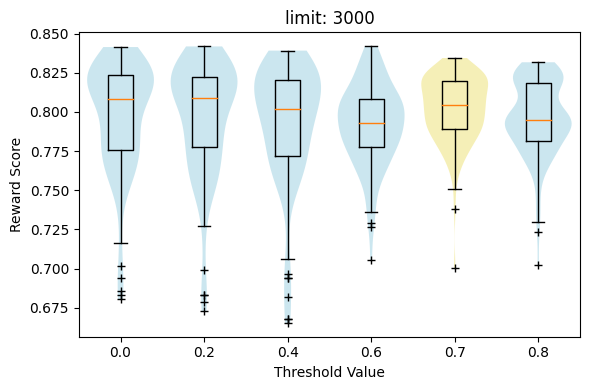

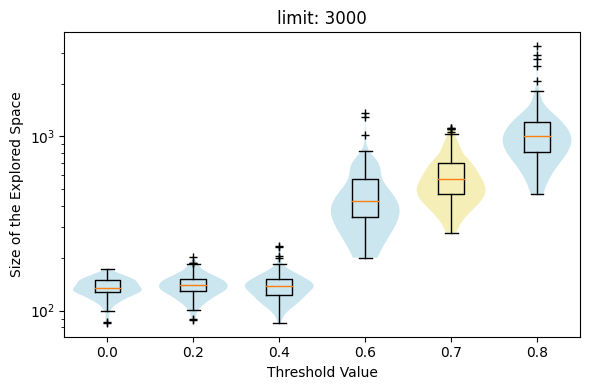

In [43]:
k=[0.5,0.6,0.7,0.8]
k=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
k=[0.0,0.2,0.4,0.6,0.7,0.8]
plot_th([3000],k,th_dict,which='best_state_score',scale='linear',y_label="Reward Score")
plot_th([3000],k,th_dict,which='tree_size',scale='log',y_label="Size of the Explored Space")

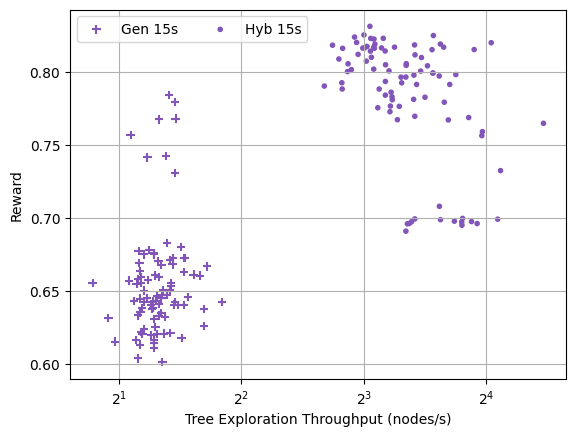

In [44]:
time_plot_labels=[375]
plot_score_vs_throughput(time_plot_labels,xscale='log',xbase=2) 
time_plot_labels=[375,1125,2250,3000,4500,7500]
#plot_throughput_dist(time_plot_labels,xscale='log',xbase=2) 

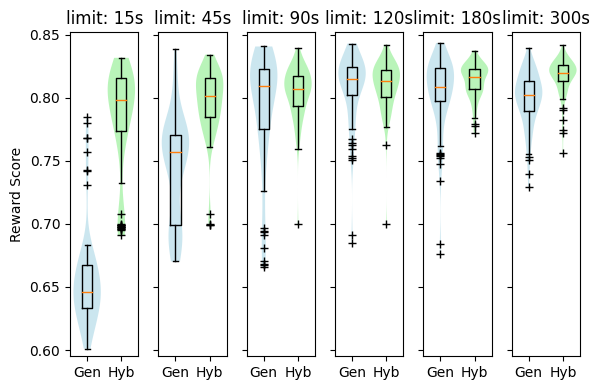

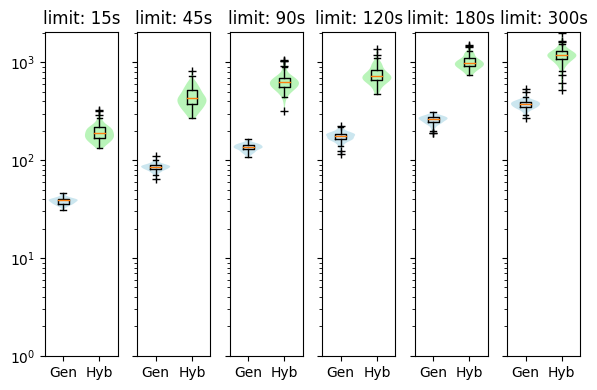

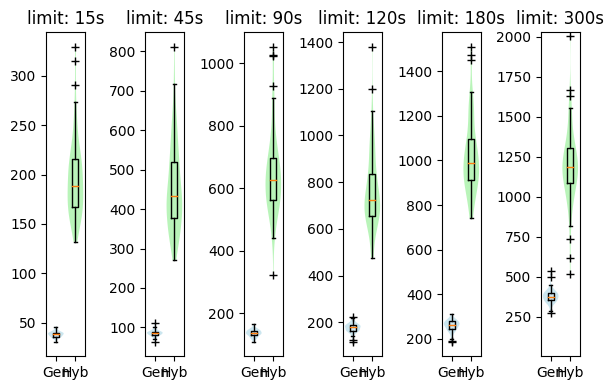

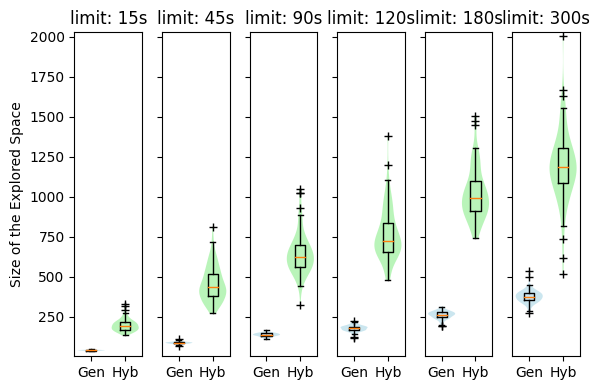

In [48]:
time_plot_labels=[375,1125,2250,3000,4500,7500]
label_fn= lambda x: f'{int(x*40/1000)}s'
plot_dist(time_plot_labels,time_dict,which='best_state_score',scale='linear',label_function=label_fn,y_label='Reward Score') #which in data data.__dict__.keys()
plot_dist(time_plot_labels,time_dict,which='tree_size',scale='log',label_function=label_fn) #which in data data.__dict__.keys()
plot_dist(time_plot_labels,time_dict,which='tree_size',scale='linear',sharey=False,label_function=label_fn) #which in data data.__dict__.keys()
plot_dist(time_plot_labels,time_dict,which='tree_size',scale='linear',label_function=label_fn,y_label='Size of the Explored Space') #which in data data.__dict__.keys()
#plot_dist(time_plot_labels,time_dict,which='evolved_state_score',scale='linear',label_function=label_fn) #which in data data.__dict__.keys()



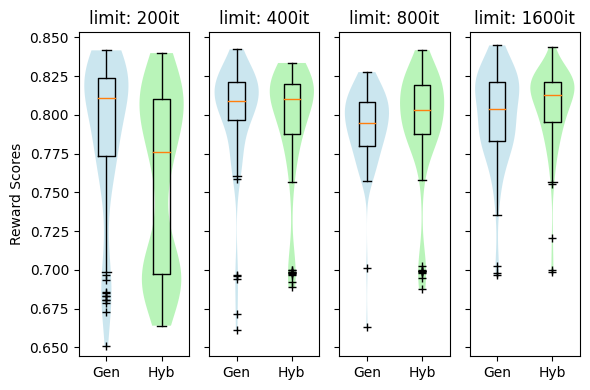

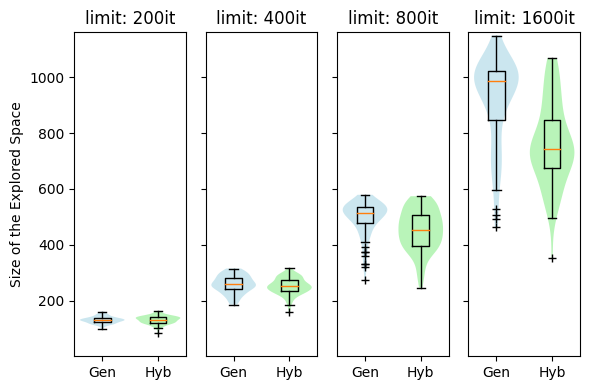

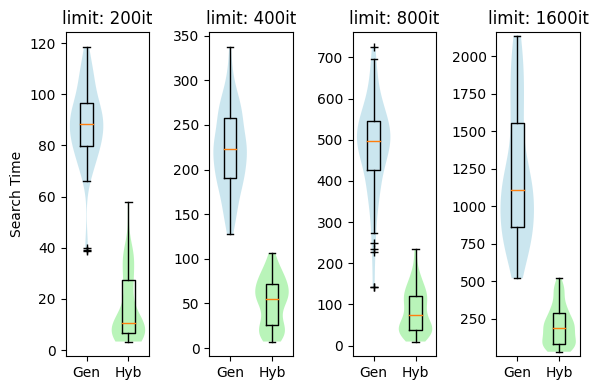

In [56]:
it_plot_labels=[5,10,20,40]
label_fn= lambda x: f'{str(x*40)}it'
plot_dist(it_plot_labels,it_dict,which='best_state_score',scale='linear',label_function=label_fn,y_label='Reward Scores') #which in data data.__dict__.keys()
plot_dist(it_plot_labels,it_dict,which='tree_size',scale='linear',label_function=label_fn,y_label='Size of the Explored Space') #which in data data.__dict__.keys()
plot_dist(it_plot_labels,it_dict,which='time',scale='linear',base=2,label_function=label_fn,sharey=False, y_label='Search Time') #which in data data.__dict__.keys()

#plot_dist(it_plot_labels,it_dict,which='time',scale='log',base=10,label_function=label_fn) #which in data data.__dict__.keys()

In [23]:
import matplotlib.pyplot as plt
def plot_platform_stats(label_list,data_list):
    fig,ax= plt.subplots(1, 1, figsize=(10,6))
    
    for label_series, data_series in zip(label_list,data_list):
        for i,label in enumerate(label_series):
            d = [data.best_state['reward_stats'] for data in data_series[str(label)] if 'latency_score' in data.best_state['reward_stats'] and data.best_state_score>0.7]#if data.evaluator=='GeneticEvaluator']

            latency= [y['latency_score'] for y in d]
            connectivity =[x["connectivity_score"] for x in d]
            cost_score = [c["cost_score"] for c in d]
            total_cost = [c["total_cost"] for c in d]

            score = [x["score"] for x in d]

            cost_score = np.array(cost_score)
            normalized_cost=(cost_score-np.min(cost_score))/(np.max(cost_score)-np.min(cost_score))*100
            normalized_score=(np.exp(4*(score-np.min(score))/(np.max(score)-np.min(score)))-1)/54*90+10

            plt.scatter(latency, connectivity, c=total_cost, s=normalized_score,  cmap='viridis')#s=normalized_score,
       
    
    cbar2 = plt.colorbar()
    cbar2.set_label('totalCost', rotation=270, labelpad=15)
    
    plt.xlim([0.55, 0.72])
    plt.ylim([0.79,1.01])
    #plt.ylim([0, 2])
    
    plt.xlabel("latencyScore", labelpad=15)
    plt.ylabel("connectivityScore",labelpad=15)
    
    #handles2, labels2 = sc2.legend_elements(prop="sizes", alpha=0.6)
    #legend2 = ax2.legend(handles2, labels2, loc="upper right", title="Overloads")
    

    plt.show()
    


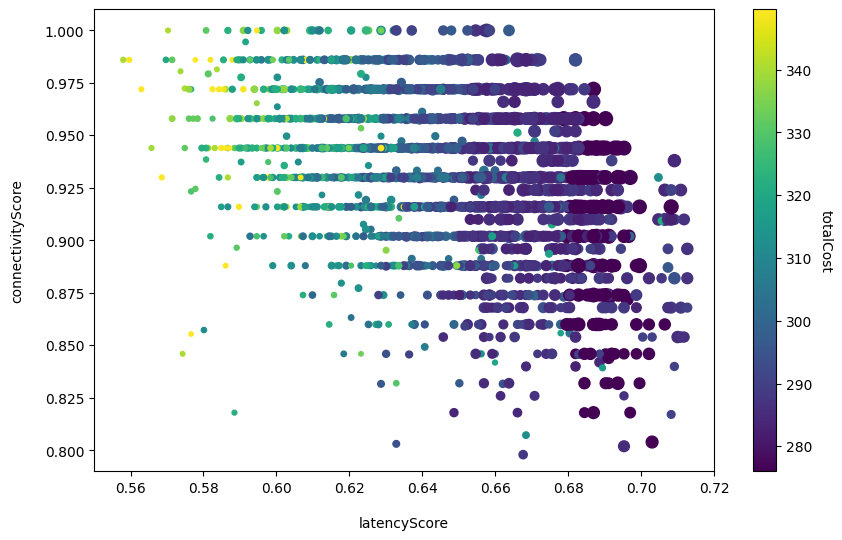

In [24]:
plot_labels=time_dict.keys()
#plot_labels=it_dict.keys()
plot_platform_stats([time_dict.keys(),it_dict.keys()],[time_dict,it_dict])

In [25]:
def calculate_stats(label_list,data_list):   
    for label_series, data_series in zip(label_list,data_list):
        for i,label in enumerate(label_series):
            

SyntaxError: incomplete input (4271189210.py, line 4)